<a href="https://colab.research.google.com/github/saikumartech/DS-Practice/blob/main/Chapter_3%2C_Model_3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model 3.5 - Convolutional Neural Network with Data Augmentation on CIFAR-10

In this example, we will implement a Convolutional Neural Network (CNN) for classifying CIFAR-10 images, but this time, we will incorporate **data augmentation** to artificially increase the size of our training set by generating modified versions of the training images.

Data augmentation techniques, such as rotating, shifting, and zooming images, help improve model generalization and reduce overfitting.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Step 1: Load and Preprocess the CIFAR-10 Dataset

We will load the CIFAR-10 dataset, normalize the images, and convert the labels to one-hot encoding, just like we did in Model 3.4. However, this time we will use **data augmentation** during training.


In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Preprocess the data: Normalize the pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### Step 2: Apply Data Augmentation

We will use Keras' `ImageDataGenerator` class to apply random transformations like rotation, width/height shift, zoom, and horizontal flip to the training images. This will help the model generalize better by learning from varied versions of the images.


In [3]:
# Define the data augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=20,         # Random rotation between -20 and 20 degrees
    width_shift_range=0.2,     # Random width shift
    height_shift_range=0.2,    # Random height shift
    shear_range=0.2,           # Random shear
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Random horizontal flip
    fill_mode='nearest'        # Fill missing pixels with nearest value
)

# Fit the data augmentation generator on the training data
datagen.fit(x_train)


### Step 3: Build the CNN Model

We will use a similar model architecture as in Model 3.4 but now train it with augmented data. The model consists of three convolutional layers, followed by max-pooling layers, and a fully connected layer with 64 units.


In [4]:
# Build the CNN model
model_3_5 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 4: Compile and Train the Model with Data Augmentation

We will compile the model with the Adam optimizer and categorical cross-entropy loss, and then train it using the augmented data. The model will run for 10 epochs and will be validated on the test set.


In [5]:
# Compile the model
model_3_5.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model using the data augmentation generator
history_3_5 = model_3_5.fit(datagen.flow(x_train, y_train, batch_size=64),
                             epochs=10,
                             validation_data=(x_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 131ms/step - accuracy: 0.2612 - loss: 1.9647 - val_accuracy: 0.4519 - val_loss: 1.4742
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 135s 123ms/step - accuracy: 0.4139 - loss: 1.5968 - val_accuracy: 0.5149 - val_loss: 1.3340
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 122ms/step - accuracy: 0.4711 - loss: 1.4541 - val_accuracy: 0.5835 - val_loss: 1.1515
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step - accuracy: 0.5093 - loss: 1.3681 - val_accuracy: 0.5674 - val_loss: 1.2030
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step - accuracy: 0.5296 - loss: 1.3183 - val_accuracy: 0.6138 - val_loss: 1.0926
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 125ms/step - accuracy: 0.5462 - loss: 1.2722 - val_accuracy: 0.6011 - val_loss: 1.1236
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 126ms/step - accuracy: 0.5644 - loss: 1.2205 - val_accuracy: 0.6261 - val_loss: 1.0558
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 126ms/step - accuracy: 0.5688 - loss: 1.2043 - 

### Step 5: Plot Training and Validation Accuracy

Now, we can visualize the training and validation accuracy over the epochs to see the effect of data augmentation on model performance.


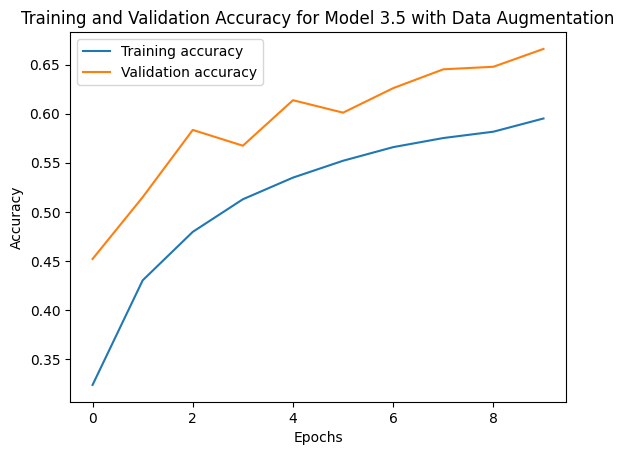

In [7]:
# Plot training and validation accuracy
plt.plot(history_3_5.history['accuracy'], label='Training accuracy')
plt.plot(history_3_5.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for Model 3.5 with Data Augmentation')
plt.show()
